<a href="https://colab.research.google.com/github/AnnaFattakhova/AnnaFattakhova/blob/main/Telegram_%D0%B1%D0%BE%D1%82_%D0%B4%D0%BB%D1%8F_%D0%B8%D0%B7%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B8%D0%BD%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telegram-бот для изучения иностранного языка**  

**Проект реализован студентками НИУ ВШЭ СПб: А.Д. Лезина, В.И. Мелкозерова, А.В. Фаттахова**

В рамках проекта будет реализован бот в Telegram, который может использоваться для практики трех аспектов английского языка:

1. Перевод
2. Лексика
3. Грамматика

Он помогает изучить новые темы по грамматике и закрепить их при помощи упражнений, выполнить упражнения для изучения новой лексики и попрактиковать навыки перевода. При изучении каждого из трех аспектов языка пользователь может выбрать уровень владения языком и наиболее интересную для него тему.

### **Пользователь выбирает:**
* Категорию упражнений
  * Перевод
  * Лексика
  * Грамматика
* Уровень владения языком
  * Начальный уровень (A1–A2)
  * Средний уровень (B1–B2)
  * Продвинутый уровень (C1–C2)
* Тему (для категорий "Лексика" и "Перевод")
  * Еда
  * Погода
  * Путешествия
  * Хобби
  * Культура
  * Здоровье
* Грамматическую тему (для категории "Грамматика")
  * Времена
  * Артикли
  * Предлоги
  * Условные предложения
  * Пассивный залог
  * Модальные глаголы

### **Перевод**

1. Модель генерирует текст на русском языке.
2. Пользователь переводит текст на английский.

### **Грамматика**

1. Пользователь выбирает грамматическую категорию для изучения.
2. Модель генерирует задание с пропуском и тремя вариантами ответа.
3. Пользователь выбирает вариант ответа.

### **Лексика**

1. Модель генерирует словарь по выбранной теме.
2. Модель генерирует задание с пропуском и тремя вариантами ответа из словаря.
3. Пользователь выбирает вариант ответа.



## **1. Источник данных**  
- Модель Deepseek R1

## **2. Данные**  

* Использованы синтетические данные, производится генерация задач в режиме реального времени с помощью промпт-тюнинга  

## **3. Блок-схема алгоритма**  
**Описание логики работы модели**:
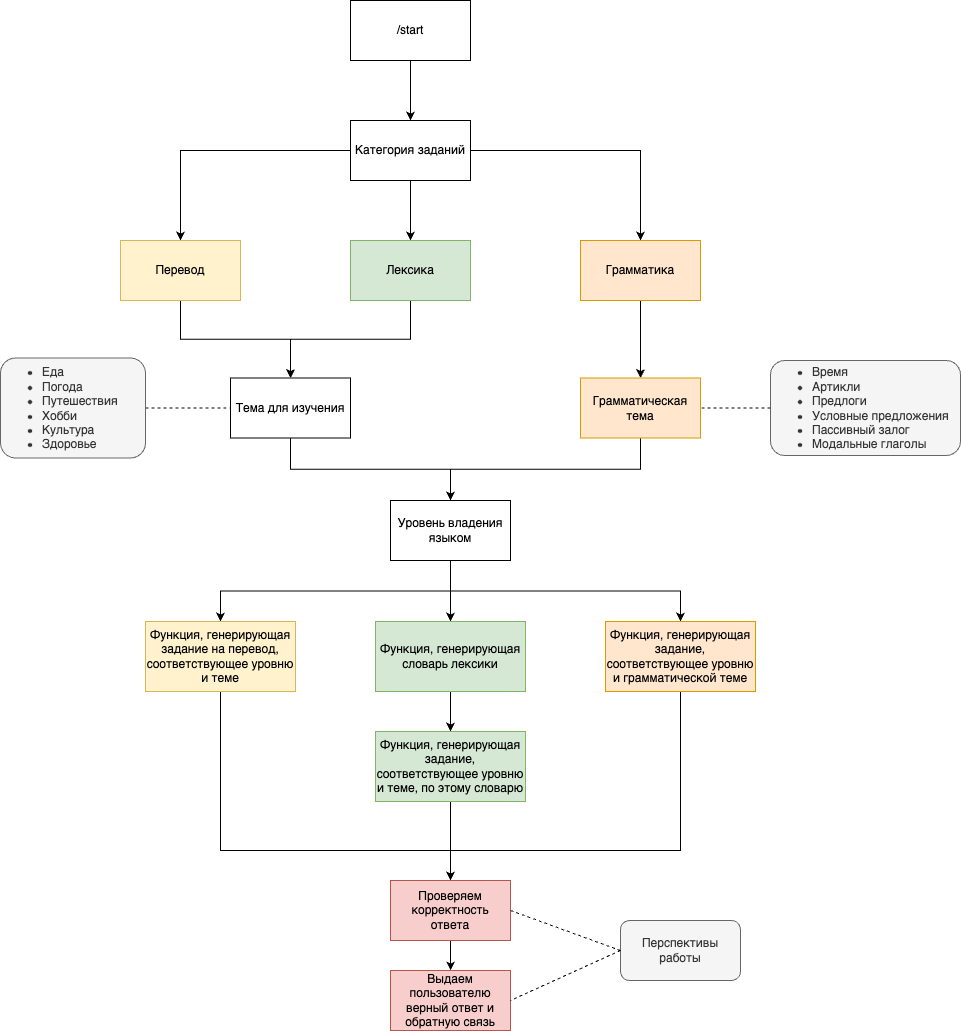
####**Пояснение**
1. **Уровень владения языком:** Определяется уровень пользователя, чтобы адаптировать сложность заданий.

2. **Тема/Грамматическая тема для изучения:** Выбирается тема для создания контекста задания.

3. **Категория упражнений:** Упражнения делятся на категории для персонализации обучения.

4. **Генерация задания:** Модель создает задание типа multiple choice на основе выбранной темы и уровня или текст для перевода.

5. Также у пользователя есть **возможность вернуться на шаг назад** для перевыбора категории или уровня, которая осуществляется при помощи кнопок (в том числе инлайн-кнопок) "Вернуться к выбору ..."

####**Перспективы работы, которые не были реализованы на этом этапе:**

5. **Проверка корректности ответа:** Ответ пользователя проверяется на правильность.

6. **Обратная связь:** Пользователю выдается правильный ответ и обратная связь для улучшения понимания изученной темы.

Этот алгоритм позволяет персонализировать обучение и обеспечивать интерактивную обратную связь для пользователя.

## **4. Построение модели**  
### 1. Базовая модель продукта  
Разрабатываемый Telegram-бот предназначен для помощи в изучении английского языка. Он предоставляет пользователям интерактивные задания по следующим направлениям:  

- Перевод (Translation Task) – бот генерирует текст на русском языке, который пользователь должен перевести.  
- Лексика (Vocabulary Task) – бот создает список тематических слов с переводом и предлагает задания с пропущенными словами.  
- Грамматика (Grammar Task) – бот формирует упражнения на грамматические темы с выбором правильного ответа.  

Для генерации заданий используется языковая модель DeepSeek-R1-Distill-Qwen-32B от Hugging Face, взаимодействие с которой реализовано через API.  

---

### 2. Архитектура проекта  
Архитектура Telegram-бота включает следующие ключевые компоненты:  

#### **2.1. Взаимодействие с Telegram API**  
- Бот и диспетчер команд:  
  - Используется библиотека aiogram для обработки сообщений.  
  - Диспетчер (`Dispatcher`) управляет обработчиками команд и сообщений.  
  - Поддерживаются команды /start и обработка кнопочных запросов.  

#### **2.2. Генерация заданий через Hugging Face API**
- Инициализирован клиент InferenceClient для общения с языковой моделью.  
- Запросы строятся в формате JSON и включают:  
  - Запрос на генерацию текста по теме и уровню.  
  - Создание списка слов и упражнений с пропусками.  
  - Генерацию грамматических заданий с вариантами ответов.  

#### **2.3. Логика обработки заданий**  
- Функции для создания задач:  
  - translation_task(level, topic) – формирует текст для перевода.  
  - generate_vocabulary(level, topic) – генерирует словарь английских слов с переводом.  
  - vocabulary_task(vocabulary, level, topic) – создает задание на лексику.  
  - task_grammar(level, grammar_topic) – генерирует упражнение по грамматике.  

#### **2.4. Взаимодействие с пользователем**  
- Меню выбора с ReplyKeyboardMarkup и InlineKeyboardMarkup.  
- Сохранение состояния пользователя (`user_data`), чтобы отслеживать выбор категории, уровня и темы.  
- Обработчики (`@dp.message` и `@dp.callback_query`) управляют взаимодействием пользователя с ботом.  

#### **2.5. Запуск бота**
- Основной цикл (`async def main()`), запускающий polling для обработки входящих сообщений.

### **7. Инструкция по запуску**  

Чтобы запустить Telegram-бота для изучения английского языка, выполните следующие шаги:  

#### **1. Установите необходимые библиотеки**
Убедитесь, что у вас установлены все требуемые библиотеки. Если чего-то не хватает, установите их с помощью pip:  
pip install aiogram huggingface_hub
#### **2. Подготовьте токены**
Добавьте в код бота:  
- API-токен Telegram-бота (его можно получить в @BotFather).  
- Hugging Face API Token (получается в личном кабинете Hugging Face).  
API_TOKEN = "ваш_telegram_token"
HUGGINGFACE_TOKEN = "ваш_huggingface_token"

#### **3. Запустите бот**
Откройте файл с кодом и запустите его командой:
python bot.py
Бот начнет слушать входящие сообщения и реагировать на команды.  

---

####**Описание пользователей, которым будет полезна модель**

Этот Telegram-бот предназначен для людей, изучающих английский язык, и будет полезен:  

- Студентам и школьникам, желающим улучшить знание лексики, грамматики и навыков перевода.  
- Преподавателям английского, которые могут использовать задания для дополнительных упражнений.  
- Самоучкам, изучающим язык самостоятельно.  
- Путешественникам, которым нужен быстрый доступ к тематическим словарям и упражнениям.  
- Деловым людям, которые хотят подтянуть английский для работы.  

Бот подходит для разных уровней владения языком (A1–C2), адаптируя задания под пользователя.

## **8. Код**

In [ ]:
# (!) Необходимо добавить токен бота и Huggingface токен

# Токен API бота
API_TOKEN = "token"

# Инициализация клиента API Hugging Face
from huggingface_hub import InferenceClient
model_name = "deepseek-ai/DeepSeek-R1-Distill-Qwen-32B"
client = InferenceClient(model_name, token='token', headers={"Accept-Charset": "utf-8"})  # Принудительно устанавливаем utf-8, иначе может слететь кодировка

# Инициализация бота и диспетчера
bot = Bot(token=API_TOKEN)
dp = Dispatcher()

## Задание на перевод
# Функция для генерации текста на заданную тему и уровень
def translation_task(level, topic):
  response_format = { # Здесь и далее такой формат необходим для того, чтобы модель выводила только само задание, без Reasoning
      "type": "json",
      "value": {
          "properties": {
              "task": {"type": "string"},
              "solution": {"type": "string"},
          },
          "required": ["task", "solution",]
      },
  }

# Отправляем запрос к модели для генерации задания на основе входных данных (тема и уровень владения языком)
  response = client.chat_completion(
      messages=[
              {"role": "system", "content": f"You're a language learning assistant. "
                                            f"Generate a text on topic '{topic}' that matches level {level}."
                                            f"Provide only the final text without any reasoning or explanations."
                                            f"Generate a text in Russian language",
          "role": "user", "content": f"Generate a text in Russian language on the topic '{topic}' matching level {level} and provide only the final text without any reasoning or explanations."}
          ],
      response_format=response_format,
      max_tokens=700, # Максимальная длина вывода
      temperature=0.5,  # Температура
      top_p=0.5)     # Объем выборки для сэмплирования

  model_response = response.choices[0].message.content
  parsed_data = json.loads(model_response)
  solution_text = parsed_data["solution"]
  return solution_text # Возвращаем только ответ модели (то есть задание для пользователя)

##  Задание на лексику
# Функция для генерации словаря слов на заданную тему и соответсвующего уровню пользователя
def generate_vocabulary(level, topic):
    response = client.chat_completion(
        messages=[
            {"role": "system", "content": f"You're a language learning assistant. "
                                         f"Use Russian for communication. "
                                         f"Provide only the final text without any reasoning or explanations."
                                         f"Generate a Python dictionary with a list of 15 words in English (level {level}, topic {topic}) "
                                         f"with their translations into Russian."},
            {"role": "user", "content": f"Generate a Python dictionary with a list of 15 words in English (level {level}, topic {topic}) "
                                        f"with their translations into Russian. Return the result only as a dictionary, "
                                        f"where keys are words and values are their Russian translations. "
                                        f"Do not include any additional explanation or text. Only provide the dictionary."}
        ],
        max_tokens=700,
        temperature=0.5,
        top_p=0.5
    )

    # Сохраняем только сам словарь, без Reasoning
    response_content = response.choices[0].message['content']
    match = re.search(r'\{.*\}', response_content, re.DOTALL) # Ищем словарь в ответе модели при помощи регулярных выражений

    if match:
        dictionary_str = match.group(0)
        try:
            vocabulary = eval(dictionary_str)
            return vocabulary # Возвращаем только словарь
        except:
            return f"Ошибка: не удалось преобразовать в словарь. Ответ модели: {response_content}"
    else:
        return f"Ошибка: не найден словарь в ответе. Ответ модели: {response_content}"

# Функция для генерации задания на лексику на основе полученного словаря, темы и уровня пользователя
def vocabulary_task(vocabulary, level, topic):
  response_format = {
      "type": "json",
      "value": {
          "properties": {
              "task": {"type": "string"},
              "solution": {"type": "string"},
          },
          "required": ["task", "solution",]
      },
  }
  output = client.chat.completions.create(
          messages=[
              {"role": "system", "content": "You're a language learning assistant\n"
                                            f"Use Russian for tasks and communication"
                                            f"Generate interesting sentence in English with one word from {vocabulary.keys()}."
                                            f"The sentence must correspond to the user's level {level} and correspond to the topic {topic}\n"
                                            f"Replace the word from {vocabulary.keys()} with the gaps."
                                            f"Provide 3 options for filling the gap: one is correct and the other two options shouldn't make sense (they must NOT be from {vocabulary.keys()})."
                                            "There is an example: At the airport, I need to show my __ (passport/hat/apple) at security."
               },

          ],
          stream=False,
          response_format=response_format,
          max_tokens=700, # Максимальная длина вывода
          temperature=0.5, # Температура
          top_p=0.5 # Объем выборки для сэмплирования
          )
  our_model_response = output.choices[0].get('message')['content']
  data = json.loads(our_model_response)
  solution_only = data["solution"]
  return solution_only # Возвращаем только ответ модели (то есть задание для пользователя)

# Задание на грамматику: функция для генерации задания на грамматику на основе грамматической темы и уровня пользователя
def task_grammar(level, grammar_topic):
    response_format = {
        "type": "json",
        "value": {
            "properties": {
                "task": {"type": "string"},
                "options": {"type": "array", "items": {"type": "string"}},
                "solution": {"type": "string"},
            },
            "required": ["task", "options", "solution"]
        },
    }

    response = client.chat_completion(
        messages=[
            {"role": "system", "content": f"You are an English language learning assistant. "
                                          f"Generate a grammar exercise on the topic '{grammar_topic}'. "
                                          f"The exercise should match the English proficiency level {level}. "
                                          f"It should be a sentence with a gap and three answer choices, "
                                          f"where two are incorrect and one is correct. "
                                          f"Return the response in JSON format with 'task', 'options', and 'solution' fields."},
            {"role": "user", "content": f"Generate an exercise on the topic '{grammar_topic}'. "
                                        f"for the English proficiency level {level}. "
                                        f"The exercise should be formatted as JSON with 'task', 'options', and 'solution' keys."}
        ],
        response_format=response_format,
        max_tokens=700, # Максимальная длина вывода
        temperature=0.5, # Температура
        top_p=0.5 # Объем выборки для сэмплирования
    )

    # Преобразуем JSON-ответ в Python-объект
    exercise_data = json.loads(response.choices[0].message.content)

    # Формируем текст задания
    task_text = exercise_data["task"] + "\n"
    for i, option in enumerate(exercise_data["options"], 1):
        task_text += f"{i}) {option}\n"

    correct_answer = exercise_data["solution"]  # Сохраняем правильный ответ отдельно: потом это будет использовано для внедрения проверки заданий

    return task_text, correct_answer  # Возвращаем только задание, ответ остается скрытым


## Инициализация клавиатур
# Клавиатура выбора категории (типа заданий)
category_keyboard = ReplyKeyboardMarkup(
    keyboard=[
        [KeyboardButton(text="Перевод")],
        [KeyboardButton(text="Лексика"), KeyboardButton(text="Грамматика")]
    ],
    resize_keyboard=True,
    input_field_placeholder="Выберите категорию упражнений:"
)

# Клавиатура выбора уровня с кнопкой "Вернуться к выбору категории"
level_keyboard = ReplyKeyboardMarkup(
    keyboard=[
        [KeyboardButton(text="Начальный уровень (A1—A2)")],
        [KeyboardButton(text="Средний уровень (B1—B2)")],
        [KeyboardButton(text="Продвинутый уровень (C1—C2)")],
        [KeyboardButton(text="Вернуться к выбору категории")]
    ],
    resize_keyboard=True,
    input_field_placeholder="Выберите ваш уровень владения английским языком:"
)

# Инлайн-клавиатура выбора темы с кнопкой "Вернуться к выбору уровня"
topic_inline_keyboard = InlineKeyboardMarkup(
    inline_keyboard=[
        [InlineKeyboardButton(text="Еда", callback_data="topic_Еда"),
         InlineKeyboardButton(text="Погода", callback_data="topic_Погода")],
        [InlineKeyboardButton(text="Путешествия", callback_data="topic_Путешествия"),
         InlineKeyboardButton(text="Хобби", callback_data="topic_Хобби")],
        [InlineKeyboardButton(text="Культура", callback_data="topic_Культура"),
         InlineKeyboardButton(text="Здоровье", callback_data="topic_Здоровье")],
        [InlineKeyboardButton(text="Вернуться к выбору уровня", callback_data="back_to_level")]
    ]
)

# Основные грамматические темы (типы заданий по грамматике)
grammar_topics = [
    "Tenses (Времена)",
    "Articles (Артикли)",
    "Prepositions (Предлоги)",
    "Conditionals (Условные предложения)",
    "Passive Voice (Пассивный залог)",
    "Modal Verbs (Модальные глаголы)"
]

# Инлайн-клавиатура выбора грамматической темы с кнопкой "Вернуться к выбору уровня"
grammar_inline_keyboard = InlineKeyboardMarkup(
    inline_keyboard=[
        [InlineKeyboardButton(text=topic, callback_data=f"grammar_{topic}")]
        for topic in grammar_topics
    ] + [
        [InlineKeyboardButton(text="Вернуться к выбору уровня", callback_data="back_to_level")]
    ]
)

## Хранение данных пользователя (чтобы учитывать, что он выбирает по кнопкам)
user_data = {}

# Обработчик команды /start
@dp.message(Command("start"))
async def start_command(message: types.Message):
    await message.answer("Добро пожаловать! Выберите категорию упражнений:", reply_markup=category_keyboard)

# Обработчик команды выбора категории (типа задания)
@dp.message(lambda message: message.text in ["Перевод", "Лексика", "Грамматика"])
async def set_category(message: types.Message):
    user_id = message.from_user.id
    user_data[user_id] = {"category": message.text}
    await message.answer("Выберите ваш уровень владения языком:", reply_markup=level_keyboard)

# Обработчик команды "Вернуться к выбору категории"
@dp.message(lambda message: message.text == "Вернуться к выбору категории")
async def back_to_category(message: types.Message):
    await message.answer("Выберите категорию упражнений:", reply_markup=category_keyboard)

# Обработчик команды "Вернуться к выбору уровня"
@dp.callback_query(lambda c: c.data == "back_to_level")
async def back_to_level(callback: types.CallbackQuery):
    await callback.message.answer("Выберите ваш уровень владения языком:", reply_markup=level_keyboard)
    await callback.answer()

# Обработчик команды выбора уровня
@dp.message(lambda message: message.text in ["Начальный уровень (A1—A2)", "Средний уровень (B1—B2)", "Продвинутый уровень (C1—C2)"])
async def set_level(message: types.Message):
    user_id = message.from_user.id
    if user_id not in user_data:
        user_data[user_id] = {}
    user_data[user_id]["level"] = message.text
    category = user_data[user_id]["category"]

    if category == "Грамматика":
        await message.answer("Выберите тему грамматики:", reply_markup=grammar_inline_keyboard)
    else:
        await message.answer("Выберите тему:", reply_markup=topic_inline_keyboard)

# Обработчик команды выбора типа заданий для категории "Грамматика"
@dp.callback_query(lambda c: c.data.startswith("grammar_"))
async def set_grammar_topic(callback: types.CallbackQuery):
    user_id = callback.from_user.id
    if user_id in user_data and user_data[user_id]["category"] == "Грамматика":
        grammar_topic = callback.data.split("_")[1]
        user_data[user_id]["grammar_topic"] = grammar_topic
        level = user_data[user_id]["level"]
        await callback.message.answer(f"Вы выбрали тему: {grammar_topic}\nГотовим задание...")

        task_text, correct_answer = task_grammar(level, grammar_topic)
        await callback.message.answer(f"Вот ваше задание по грамматике:\n\n{task_text}")
        await callback.answer()
    else:
        await callback.message.answer("Пожалуйста, сначала выберите уровень.")

# Обработчик команды выбора темы для заданий категории "Перевод" и "Лексика"
@dp.callback_query(lambda c: c.data.startswith("topic_"))
async def set_topic(callback: types.CallbackQuery):
    user_id = callback.from_user.id
    topic = callback.data.split("_")[1]
    if user_id in user_data:
        user_data[user_id]["topic"] = topic
        level = user_data[user_id]["level"]
        category = user_data[user_id]["category"]
        await callback.message.answer(f"Вы выбрали тему: {topic}\nГотовим задание...")

        if category == "Перевод": # Генерация задания для перевода
            task_text = translation_task(level, topic)
            await callback.message.answer(f"Вот ваше задание:\n\n{task_text}")
        elif category == "Лексика": # Генерация задания для категории "Лексика"
            # Генерация словаря
            vocabulary = generate_vocabulary(level, topic)
            if isinstance(vocabulary, dict):
                # Выводим словарь
                vocabulary_text = "Словарь слов:\n\n"
                for word, translation in vocabulary.items():
                    vocabulary_text += f"{word} — {translation}\n"
                await callback.message.answer(vocabulary_text)

                # Генерация задания на основе словаря
                task_text = vocabulary_task(vocabulary, level, topic)
                await callback.message.answer(f"Вот ваше задание:\n\n{task_text}")
            else:
                await callback.message.answer(vocabulary)  # Ошибка генерации словаря
        else:
            await callback.message.answer("Ошибка") # Ошибка генерации словаря

        await callback.answer()
    else:
        await callback.message.answer("Пожалуйста, сначала выберите уровень.")

# Основной запуск бота
async def main():
    bot = Bot(token=API_TOKEN)
    await dp.start_polling(bot)

if __name__ == "__main__":
    await main()

## **8. Перспективы развития**  
1) Добавление функции проверки ко всем заданиям

In [ ]:
# Функция проверки задания на перевод

def review(text, translation):
  response_format = {
      "type": "json",
      "value": {
          "properties": {
              "task": {"type": "string"},
              "solution": {"type": "string"},
          },
          "required": ["task", "solution",]
      },
  }
  response = client.chat_completion(
          # Промпты
          messages=[
              {"role": "system", "content": "You're a language learning assistant. "
                                            "Use Russian for communication. Do not use English."
                                            f"Compare the my response {translation} with the the original text {text}\n"
                                            f"Check the my translation from Russian to English"
                                            "Give feedback, point out the mistakes and explain how to do it correctly\n"
                                            "Be polite and support the my\n"
                                            "Provide only the final text without any reasoning."},

         {"role": "user", "content": f"Compare my response {translation} with the the original text {text}, сheck the my ranslation from Russian to English. Address me only in Russian with a respectful 'you'. Explain mistakes and provide only polite and supportive feedback without any reasoning. Do not use English"}
          ],

         response_format=response_format,
         max_tokens=700,
         temperature=0.5,  # Температура
         top_p=0.5)     # Объем выборки для сэмплирования
  model_response = response.choices[0].message.content
  parsed_data = json.loads(model_response)
  solution_text = parsed_data["solution"]
  return solution_text

In [ ]:
# Функция проверки задания на грамматику

def check_answer(user_answer: str, correct_answer: str) -> str:
    if user_answer.strip().lower() == correct_answer.strip().lower():
        return "✅ Correct! Well done! 🎉"
    else:
        return f"❌ Incorrect. The correct answer is: {correct_answer}."

# Пример использования
user_answer = "children"  # Подставить ответ пользователя
correct_answer = "children"  # Это правильный ответ

feedback = check_answer(user_answer, correct_answer)
print(feedback)